In [64]:
import pandas as pd
import numpy as np

In [65]:
data_fake = pd.read_csv('Fake.csv')
data_true = pd.read_csv('True.csv')


In [66]:
data_fake['Label'] = 'Fake'

In [67]:
data_true['Label'] = 'True'

In [68]:
data = pd.concat([data_fake, data_true])


In [69]:
data['Label'].value_counts()

Label
Fake    23481
True    21417
Name: count, dtype: int64

In [70]:
data = data.drop(columns=['subject', 'date'])

In [71]:
data.isna().sum()

title    0
text     0
Label    0
dtype: int64

In [72]:
data = data.drop_duplicates()

In [73]:
data.duplicated().sum()

0

In [74]:
data.shape

(39105, 3)

## Preprocessing data

In [75]:
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import numpy as np

In [76]:
data['Label'].value_counts()

Label
True    21197
Fake    17908
Name: count, dtype: int64

In [77]:
def process_text(text):
    text = re.sub(r'\s+', ' ', text, flags=re.I) # Remove extra white space from text

    text = re.sub(r'\W', ' ', str(text)) # Remove all the special characters from text

    text = re.sub(r'\s+[a-zA-Z]\s+', ' ', text) # Remove all single characters from text

    text = re.sub(r'[^a-zA-Z\s]', '', text) # Remove any character that isn't alphabetical

    text = text.lower()

    words = word_tokenize(text)

    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words]

    stop_words = set(stopwords.words("english"))
    Words = [word for word in words if word not in stop_words]

    Words = [word for word in Words if len(word) > 3]

    indices = np.unique(Words, return_index=True)[1]
    cleaned_text = np.array(Words)[np.sort(indices)].tolist()

    return cleaned_text

In [78]:
data.loc[:, 'cleaned'] = data['text'].apply(process_text)

In [79]:
data

,title,text,Label,cleaned
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,Fake,"[donald, trump, wish, american, happy, year, l..."
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,Fake,"[house, intelligence, committee, chairman, dev..."
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",Fake,"[friday, revealed, former, milwaukee, sheriff,..."
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",Fake,"[christmas, donald, trump, announced, would, b..."
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,Fake,"[pope, francis, used, annual, christmas, messa..."
...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,True,"[brussels, reuters, nato, ally, tuesday, welco..."
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",True,"[london, reuters, lexisnexis, provider, legal,..."
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,True,"[minsk, reuters, shadow, disused, soviet, fact..."
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,True,"[moscow, reuters, vatican, secretary, state, c..."


In [80]:
data = data.drop(columns = ['text'])

In [82]:
data['text_cleaned'] = data['cleaned']

In [84]:
data = data.drop(columns = ['cleaned'])

#### Checkpoint

In [122]:
data_clean = data.copy()

In [123]:
data

,title,Label,text_cleaned
0,Donald Trump Sends Out Embarrassing New Year’...,Fake,"[donald, trump, wish, american, happy, year, l..."
1,Drunk Bragging Trump Staffer Started Russian ...,Fake,"[house, intelligence, committee, chairman, dev..."
2,Sheriff David Clarke Becomes An Internet Joke...,Fake,"[friday, revealed, former, milwaukee, sheriff,..."
3,Trump Is So Obsessed He Even Has Obama’s Name...,Fake,"[christmas, donald, trump, announced, would, b..."
4,Pope Francis Just Called Out Donald Trump Dur...,Fake,"[pope, francis, used, annual, christmas, messa..."
...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,True,"[brussels, reuters, nato, ally, tuesday, welco..."
21413,LexisNexis withdrew two products from Chinese ...,True,"[london, reuters, lexisnexis, provider, legal,..."
21414,Minsk cultural hub becomes haven from authorities,True,"[minsk, reuters, shadow, disused, soviet, fact..."
21415,Vatican upbeat on possibility of Pope Francis ...,True,"[moscow, reuters, vatican, secretary, state, c..."


In [124]:
from sklearn.model_selection import train_test_split

In [125]:
X = [','.join(map(str, l)) for l in data['text_cleaned']]
y = data['Label']

In [126]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [128]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
word_idx = tokenizer.word_index  # Corrected syntax for accessing word index
v = len(word_idx)
print("the size of vocab =", v)  # Corrected spacing
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

the size of vocab = 91457


In [131]:
len(X_train[0])

206

In [132]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

maxlen = 150
X_train = pad_sequences(X_train,maxlen=maxlen)
X_test = pad_sequences(X_test,maxlen=maxlen)

In [134]:
y.value_counts()

Label
True    21197
Fake    17908
Name: count, dtype: int64

## Modeling

In [115]:
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense,Input,GlobalMaxPooling1D,Dropout
from tensorflow.keras.models import Model
from keras import optimizers
import numpy as np
from tensorflow.keras.optimizers import Adam

In [116]:
inputt=Input(shape=(maxlen,))
learning_rate = 0.0001
x=Embedding(v+1,100)(inputt)
x = Dropout(0.5)(x)
x = LSTM(150,return_sequences=True)(x)
x = Dropout(0.5)(x)
x = GlobalMaxPooling1D()(x)
x = Dense(64, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(2, activation='softmax')(x)

model = Model(inputt, x)

# Define optimizer with specified learning rate
optimizer = Adam(learning_rate=learning_rate)

model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [135]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

In [138]:
y_train_encoded 

array([0, 1, 1, ..., 1, 0, 0])

In [139]:
import tensorflow as tf

y_train_one_hot = tf.keras.utils.to_categorical(y_train_encoded)
y_test_one_hot = tf.keras.utils.to_categorical(y_test_encoded)

In [141]:
history = model.fit(X_train, y_train_one_hot, epochs=15, validation_data=(X_test, y_test_one_hot))

Epoch 1/15
978/978 ━━━━━━━━━━━━━━━━━━━━ 166s 167ms/step - accuracy: 0.6746 - loss: 0.5351 - val_accuracy: 0.9678 - val_loss: 0.1548
Epoch 2/15
978/978 ━━━━━━━━━━━━━━━━━━━━ 197s 162ms/step - accuracy: 0.9727 - loss: 0.0804 - val_accuracy: 0.9775 - val_loss: 0.0835
Epoch 3/15
978/978 ━━━━━━━━━━━━━━━━━━━━ 202s 162ms/step - accuracy: 0.9887 - loss: 0.0401 - val_accuracy: 0.9794 - val_loss: 0.0692
Epoch 4/15
978/978 ━━━━━━━━━━━━━━━━━━━━ 203s 163ms/step - accuracy: 0.9934 - loss: 0.0233 - val_accuracy: 0.9758 - val_loss: 0.0675
Epoch 5/15
978/978 ━━━━━━━━━━━━━━━━━━━━ 202s 162ms/step - accuracy: 0.9958 - loss: 0.0166 - val_accuracy: 0.9797 - val_loss: 0.0630
Epoch 6/15
978/978 ━━━━━━━━━━━━━━━━━━━━ 203s 163ms/step - accuracy: 0.9973 - loss: 0.0103 - val_accuracy: 0.9775 - val_loss: 0.0641
Epoch 7/15
978/978 ━━━━━━━━━━━━━━━━━━━━ 203s 164ms/step - accuracy: 0.9990 - loss: 0.0047 - val_accuracy: 0.9797 - val_loss: 0.0597
Epoch 8/15
978/978 ━━━━━━━━━━━━━━━━━━━━ 159s 163ms/step - accuracy: 0.9986 -

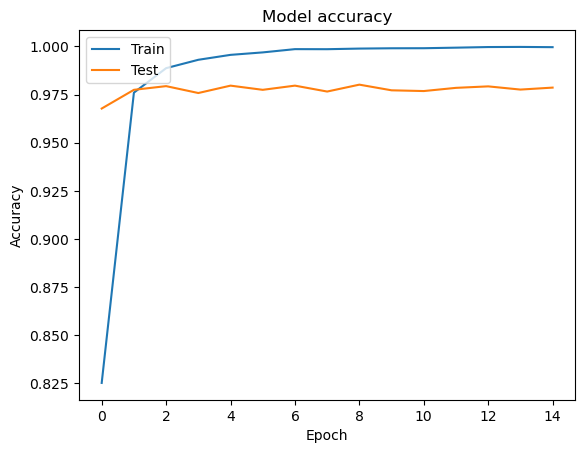

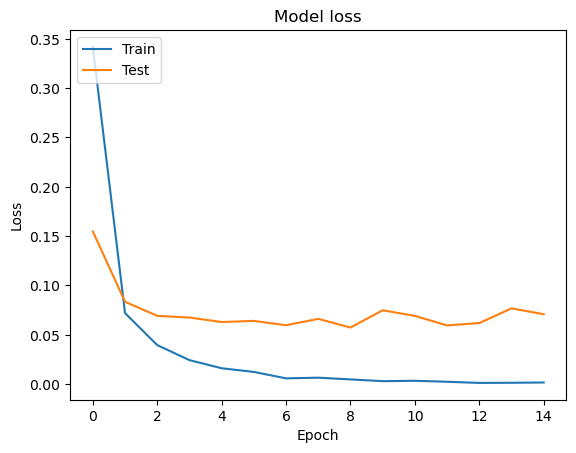

In [142]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [143]:
# Evaluate the model on the test data
loss, accuracy = model.evaluate(X_test, y_test_one_hot)

print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

245/245 ━━━━━━━━━━━━━━━━━━━━ 13s 52ms/step - accuracy: 0.9779 - loss: 0.0763
Test Loss: 0.07088260352611542
Test Accuracy: 0.9786472320556641


In [145]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np


245/245 ━━━━━━━━━━━━━━━━━━━━ 13s 51ms/step


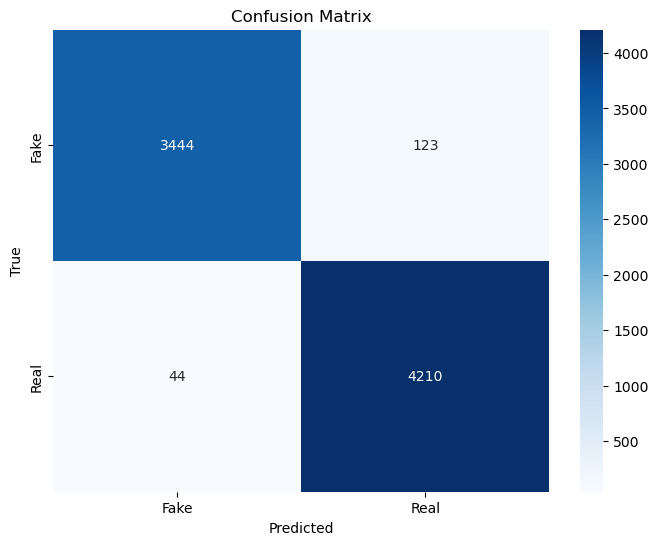

In [146]:
y_pred_probs = model.predict(X_test)
y_pred_labels = np.argmax(y_pred_probs, axis=1)
y_true_labels = np.argmax(y_test_one_hot, axis=1)
conf_matrix = confusion_matrix(y_true_labels, y_pred_labels)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Fake', 'Real'], 
            yticklabels=['Fake', 'Real'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()